In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

**Classe Ville :**  
Représentée par une position (x, y).  
*distance* : distance euclidienne de la ville a une autre.

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

**Classe Fitness :**  
Représentée par une route (ville -> ville), une distance et un score de fitness.  
*routeDistance* : calcule (si pas déjà fait) et renvoie la distance d'une ville à une autre (contenues dans la variable route).  
*routeFitness* : calcule (si pas déjà fait) et renvoie le score de fitness de la route.

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
    
    def routeDistance(self):
        if self.distance == 0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

*createRoute* : création d'une route entre deux villes choisies aléatoirement dans la liste des villes.

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

*initialPopulation* : création de la première volée d'agents avec une route initialement aléatoire.

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

*rankRoutes* : calcule le score de fitness des agents et trie le score par fitness en ordre décroissant.

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

*selection* : sélection élitiste, on garde un certain nombre des agents qui possèdent le chemin le plus court.

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

*matingPool* : création d'une pool contenant les agents "élites", les agents ayant eu le plus grand score de fitness.

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

*breed* : croisement entre deux agents qu'on appelera "parents" pour créer un fils.

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

*breedPopulation* : phase de croisement parmi les agents "élites".

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

*mutate* : mutation d'un agent par rapport à une facteur.

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

*mutatePopulation* : phase de mutation des agents.

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

*nextGeneration* : mélange de toute les phases pour calculer la prochaine génération d'agents.

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

*geneticAlgorithm* : boucle principale de l'algorithme.

In [14]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

Création de la liste des villes, représentées par des coordonnées aléatoire sur 2 axes.

In [15]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

Lancement de l'algorithme. Le panel *Out* contient le meilleur chemin à l'issu de l'algorithme génétique, représenté sous forme de la liste des villes.

In [16]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 2276.317462183047
Final distance: 946.6241551179615


[(12,150),
 (29,154),
 (30,139),
 (42,134),
 (65,133),
 (75,134),
 (138,186),
 (188,185),
 (159,177),
 (152,173),
 (133,139),
 (136,120),
 (93,88),
 (90,74),
 (72,86),
 (145,17),
 (166,17),
 (198,10),
 (155,42),
 (70,11),
 (53,12),
 (7,4),
 (47,39),
 (8,88),
 (0,148)]

*geneticAlgorithmPlot* : création d'un plot pour afficher la courbe d'amélioration des générations d'agents.

In [17]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

Courbe détaillant les générations d'agents caractérisés par la distance  minimale qu'ils ont plus obtenir.

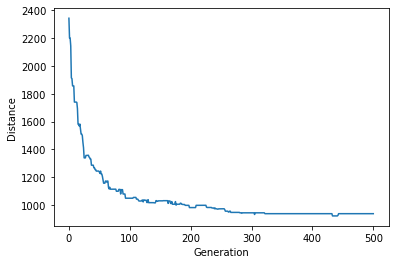

In [18]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)